<a href="https://colab.research.google.com/github/mahdiSheykhiGithub/FAKE-NEWS/blob/main/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import libraries and Load DATA

In [13]:
import nltk
import string
import pandas as pd
import numpy as np
import tensorflow as tf
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, Dense, Dropout, GRU, LSTM
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [15]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Fake NEWS/72000NEWS.csv')
data

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1
...,...,...,...,...
72129,72129,Russians steal research on Trump in hack of U....,WASHINGTON (Reuters) - Hackers believed to be ...,0
72130,72130,WATCH: Giuliani Demands That Democrats Apolog...,"You know, because in fantasyland Republicans n...",1
72131,72131,Migrants Refuse To Leave Train At Refugee Camp...,Migrants Refuse To Leave Train At Refugee Camp...,0
72132,72132,Trump tussle gives unpopular Mexican leader mu...,MEXICO CITY (Reuters) - Donald Trump’s combati...,0


# PreProcessing


In [16]:
data.drop(['title', 'Unnamed: 0'], axis=1, inplace=True)

In [17]:
data.isna().sum()

text     39
label     0
dtype: int64

In [18]:
data.dropna(inplace=True)
data.shape

(72095, 2)

In [19]:
data

,text,label
0,No comment is expected from Barack Obama Membe...,1
1,Did they post their votes for Hillary already?,1
2,"Now, most of the demonstrators gathered last ...",1
3,A dozen politically active pastors came here f...,0
4,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1
...,...,...
72129,WASHINGTON (Reuters) - Hackers believed to be ...,0
72130,"You know, because in fantasyland Republicans n...",1
72131,Migrants Refuse To Leave Train At Refugee Camp...,0
72132,MEXICO CITY (Reuters) - Donald Trump’s combati...,0


In [20]:
def text_cleaner(text):
  punc = list(string.punctuation)
  stop = stopwords.words('english')
  bad_tokens = punc + stop
  lemma = WordNetLemmatizer()

  tokens = word_tokenize(text)
  word_tokens = [t for t in tokens if t.isalpha()]
  clean_tokens = [lemma.lemmatize(t.lower()) for t in word_tokens if t not in bad_tokens]
  return " ".join(clean_tokens)

In [21]:
data['text'] = data['text'].apply(text_cleaner)
data.head()

,text,label
0,no comment expected barack obama member fukyof...,1
1,did post vote hillary already,1
2,now demonstrator gathered last night exercisin...,1
3,a dozen politically active pastor came private...,0
4,the sarmat missile dubbed satan replace fly mi...,1


# LSTM

In [22]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(data['text'])

In [23]:
encoded = tokenizer.texts_to_sequences(data['text'])

In [24]:
len_list = []
for seq in encoded:
  len_list.append(len(seq))

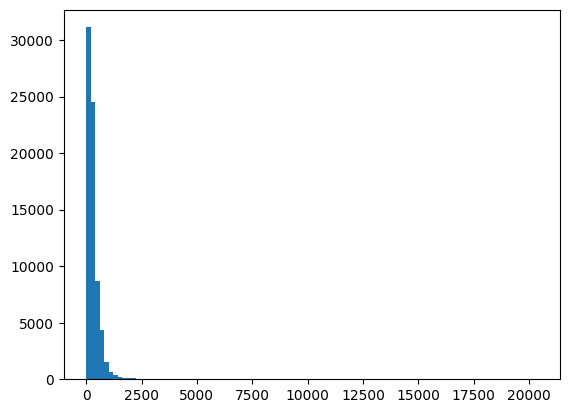

#####################################
mean of tokens 309.25913031416883
median of tokens 228.0


In [25]:
plt.hist(len_list, bins=100)
plt.show()
print('#####################################')
print(f'mean of tokens {np.average(len_list)}')
print(f'median of tokens {np.median(len_list)}')

In [26]:
max_len = 150

In [27]:
X = pad_sequences(encoded, maxlen=max_len, padding='post')
X.shape

(72095, 150)

In [28]:
X[50]

array([   32,  5650,  1971,  9242,   414,  4582, 18705,   684,   609,
       32152,    57,   898,    18, 20347,     4,   247,    79,  1013,
          85,  1951,   329,    85,   232,  5364,   250,     8, 11703,
       26563,   696, 11459,  1179,  2504,  4055,    55,  1838,    25,
          55,    15,  1105,     1,  5683,  6676,  1064, 14355,   153,
        1063,    32,    49,    32,  1838,   264,    57,   157,   209,
         285,    32,  1657,   157,   256,    57,  3232,  1660,  4554,
        4962,   836,  6195,    32, 59565,  2504,  4969,  1628,  1882,
          17,  4770,   256, 39674,  1380,   784,   410,  1129,  1129,
        7164,  1458,   329,   339,  2627,  9767,     6,  1882,   264,
       39675,  6142,    18,    57,   160,  1777,     8,   421,     8,
        1064,  1129,  1202, 10623,  3040,    99,   784,  1129,   306,
           6,   257, 59566,  9425, 10346,  1971,   133,     6, 21544,
        4554,  1129, 21544,  1129,     6, 15872, 21798,  5373,   719,
        1653,  6961,

In [29]:
y = data['label']

In [30]:
vocab_len = len(tokenizer.word_index) + 1
vocab_len

201601

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [32]:
print(f'shape of X_train : {X_train.shape}')
print(f'shape of X_test : {X_test.shape}')

shape of X_train : (61280, 150)
shape of X_test : (10815, 150)


In [33]:
reg = tf.keras.regularizers.l2(0.01)

model = Sequential()
model.add(Embedding(input_dim=vocab_len, output_dim=20, input_length=max_len, embeddings_regularizer=reg))
model.add(LSTM(units=16, activation='tanh', recurrent_dropout=0.5, dropout=0.5, kernel_regularizer=reg))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 150, 20)           4032020   
                                                                 
 lstm (LSTM)                 (None, 16)                2368      
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense (Dense)               (None, 128)               2176      
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 4036693 (15.40 MB)
Trainable params: 40366

In [35]:
opt = tf.optimizers.Adam(learning_rate=0.0001)
loss = tf.losses.BinaryCrossentropy()
metric = tf.metrics.BinaryAccuracy()
model.compile(optimizer=opt, loss=loss, metrics=metric)

In [36]:
model.fit(X_train, y_train, batch_size=100, epochs=10, validation_split=0.2, verbose=2)

Epoch 1/10
491/491 - 122s - loss: 11.0276 - binary_accuracy: 0.5609 - val_loss: 1.8477 - val_binary_accuracy: 0.7350 - 122s/epoch - 248ms/step
Epoch 2/10
491/491 - 116s - loss: 0.8864 - binary_accuracy: 0.7983 - val_loss: 0.4522 - val_binary_accuracy: 0.8740 - 116s/epoch - 236ms/step
Epoch 3/10
491/491 - 116s - loss: 0.4407 - binary_accuracy: 0.8938 - val_loss: 0.3600 - val_binary_accuracy: 0.9013 - 116s/epoch - 237ms/step
Epoch 4/10
491/491 - 117s - loss: 0.3656 - binary_accuracy: 0.9146 - val_loss: 0.3284 - val_binary_accuracy: 0.9085 - 117s/epoch - 238ms/step
Epoch 5/10
491/491 - 117s - loss: 0.3267 - binary_accuracy: 0.9247 - val_loss: 0.3180 - val_binary_accuracy: 0.9117 - 117s/epoch - 239ms/step
Epoch 6/10
491/491 - 123s - loss: 0.3068 - binary_accuracy: 0.9307 - val_loss: 0.2868 - val_binary_accuracy: 0.9230 - 123s/epoch - 251ms/step
Epoch 7/10
491/491 - 119s - loss: 0.2919 - binary_accuracy: 0.9345 - val_loss: 0.2853 - val_binary_accuracy: 0.9249 - 119s/epoch - 242ms/step
Epoch

# Evaluation

In [37]:
print(f'Test Score : {model.evaluate(X_test, y_test)}')
print(f'Train Score : {model.evaluate(X_train, y_train)}')

338/338 [==============================] - 8s 22ms/step - loss: 0.2822 - binary_accuracy: 0.9270
Test Score : [0.2821509838104248, 0.9269533157348633]
1915/1915 [==============================] - 47s 25ms/step - loss: 0.2127 - binary_accuracy: 0.9611
Train Score : [0.2127421796321869, 0.9611455798149109]


In [38]:
y_pred = model.predict(X_test)
y_pred = np.round(y_pred)

338/338 [==============================] - 7s 20ms/step


In [39]:
print(classification_report(y_pred, y_test, target_names=['FAKE', 'REAL']))

              precision    recall  f1-score   support

        FAKE       0.92      0.93      0.92      5211
        REAL       0.93      0.93      0.93      5604

    accuracy                           0.93     10815
   macro avg       0.93      0.93      0.93     10815
weighted avg       0.93      0.93      0.93     10815



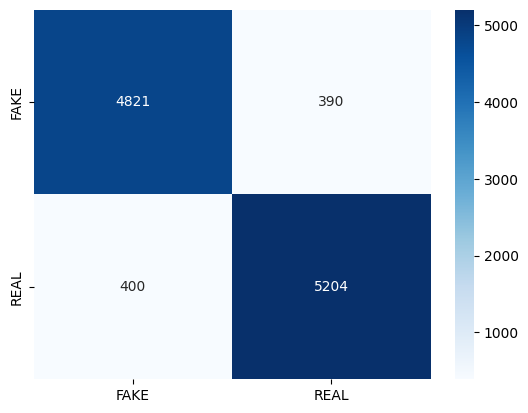

In [40]:
conf_matrix = confusion_matrix(y_pred, y_test)
sns.heatmap(
    conf_matrix,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=['FAKE', 'REAL'],
    yticklabels=['FAKE', 'REAL']
    )
plt.show()
